# Lab4-4_BA

## Berent Aldikacti

## 09/18/20

In [33]:
import plotnine as p9
import pandas as pd

surveys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()

## Exercise

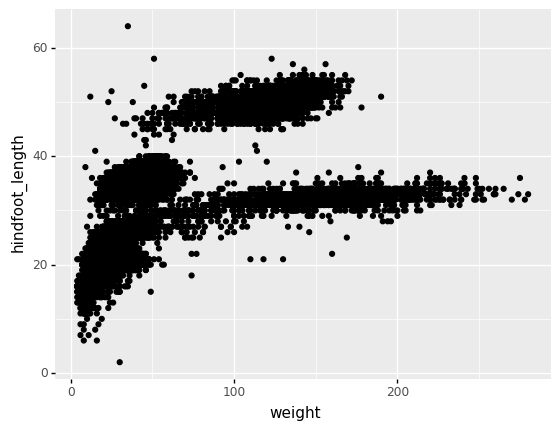

<ggplot: (8794768776989)>

In [5]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
           + p9.geom_point())

### Challenge - bar chart

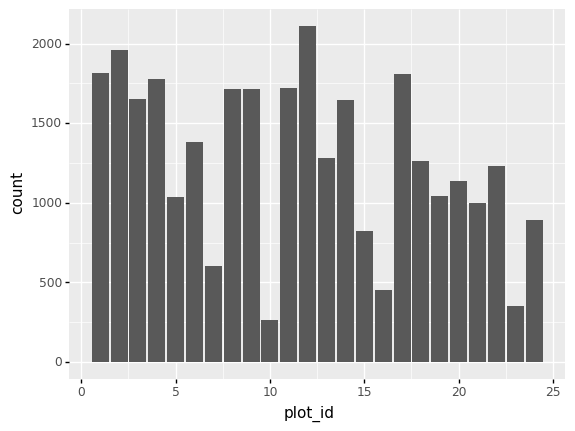

<ggplot: (8794785902641)>

In [6]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id'))
    + p9.geom_bar()
)

### Challenge - Bar plot adaptations

Adapt the bar plot of the previous exercise by mapping the sex variable to the color fill of the bar chart. Change the scale of the color fill by providing the colors blue and orange manually (see API reference to find the appropriate function).

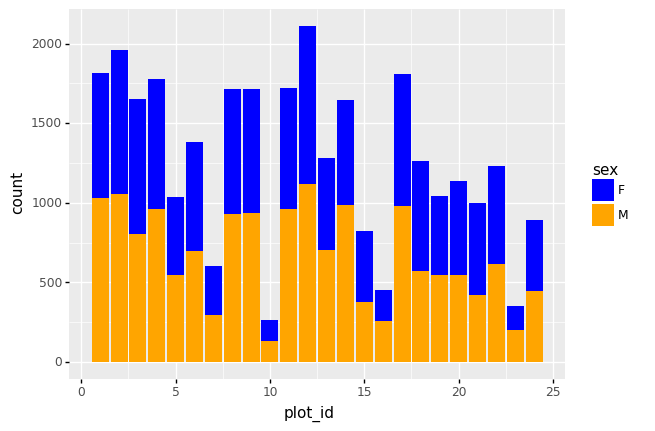

<ggplot: (8794769123085)>

In [13]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id',fill='sex'))
    + p9.geom_bar()
    + p9.scale_fill_manual(["blue", "orange"])     
)

### Challenge - distributions

1. Replace the box plot with a violin plot, see geom_violin()

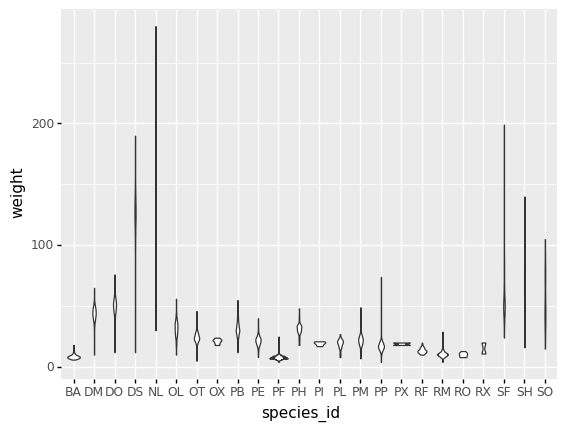

<ggplot: (8794820018725)>

In [21]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',y='weight'))
    + p9.geom_violin()
)

2. Represent weight on the log10 scale, see scale_y_log10()

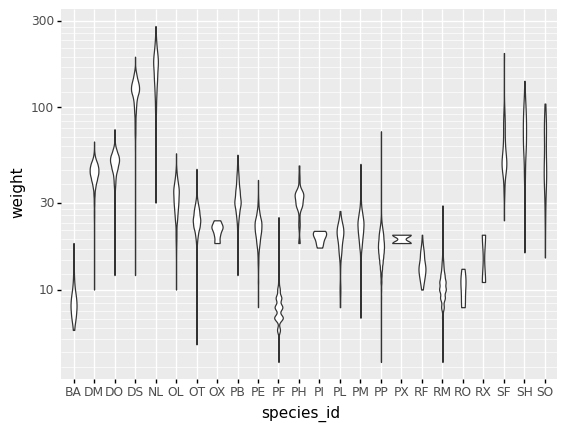

<ggplot: (8794786051125)>

In [22]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',y='weight'))
    + p9.geom_violin()
    + p9.scale_y_log10()
)

3. Add color to the datapoints on your boxplot according to the plot from which the sample was taken (plot_id)

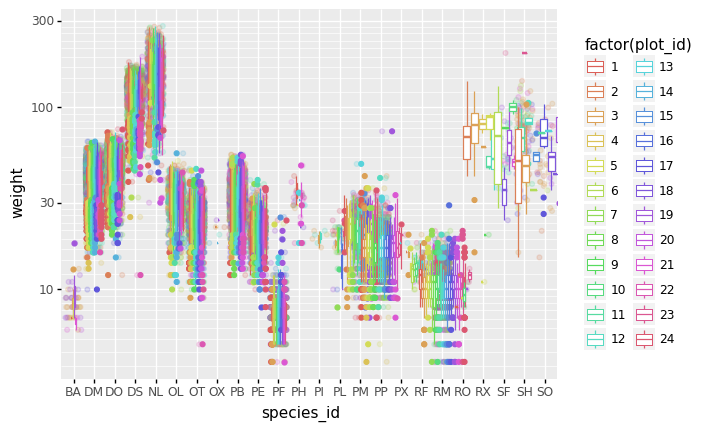

<ggplot: (8794787546521)>

In [30]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',y='weight',color='factor(plot_id)'))
    + p9.geom_jitter(alpha=0.2)
    + p9.geom_boxplot()
    + p9.scale_y_log10()
)

### Challenge - facetting

1. Create a separate plot for each of the species that depicts how the average weight of the species changes through the years.

In [43]:
df = surveys_complete.groupby(['year', 'species_id'])['weight'].mean()
df

year  species_id
1977  DM             41.143646
      DO             42.666667
      DS            122.034483
      OL             21.000000
      OX             22.000000
                       ...    
2002  PP             17.021333
      RM             10.000000
      RO             10.142857
      SF             67.400000
      SH             64.666667
Name: weight, Length: 332, dtype: float64

In [44]:
df_res = df.reset_index(name='weights')
df_res

year species_id     weights
0    1977         DM   41.143646
1    1977         DO   42.666667
2    1977         DS  122.034483
3    1977         OL   21.000000
4    1977         OX   22.000000
..    ...        ...         ...
327  2002         PP   17.021333
328  2002         RM   10.000000
329  2002         RO   10.142857
330  2002         SF   67.400000
331  2002         SH   64.666667

[332 rows x 3 columns]

/Users/baldikacti/miniconda3/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


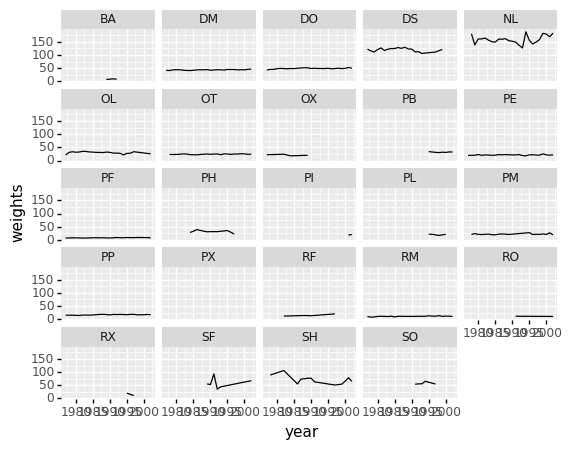

<ggplot: (8794787205641)>

In [49]:
(p9.ggplot(data=df_res,mapping=p9.aes(x='year',y='weights'))
        + p9.geom_line()
        + p9.facet_wrap("species_id")
)

2. Based on the previous exercise, visually compare how the weights of male and females has changed through time by creating a separate plot for each sex and an individual color assigned to each species_id.

In [51]:
df2 = surveys_complete.groupby(['sex', 'year', 'species_id'])['weight'].mean().reset_index()
df2

sex  year species_id      weight
0     F  1977         DM   40.213333
1     F  1977         DO   41.900000
2     F  1977         DS  117.555556
3     F  1977         OL   21.000000
4     F  1977         OX   22.000000
..   ..   ...        ...         ...
622   M  2002         PP   17.159341
623   M  2002         RM    9.400000
624   M  2002         RO    9.500000
625   M  2002         SF   63.750000
626   M  2002         SH   64.285714

[627 rows x 4 columns]

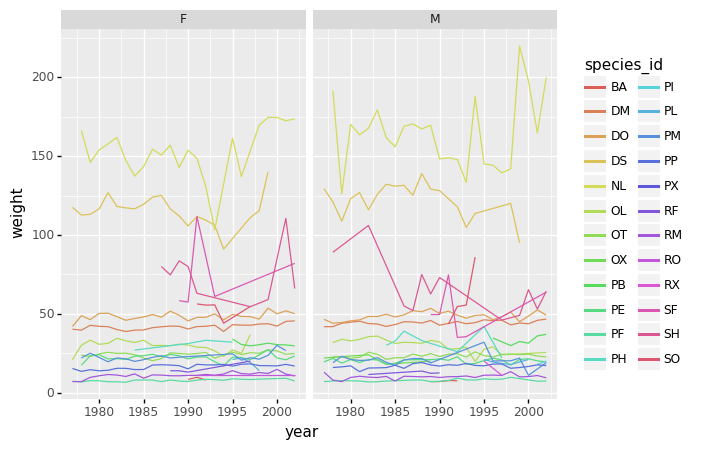

<ggplot: (8794802363657)>

In [55]:
(p9.ggplot(data=df2,mapping=p9.aes(x='year',y='weight',color='species_id'))
        + p9.geom_line()
        + p9.facet_wrap('sex')
)

### Challenge - customizations

1. See if you can change thickness of lines for the line plot .

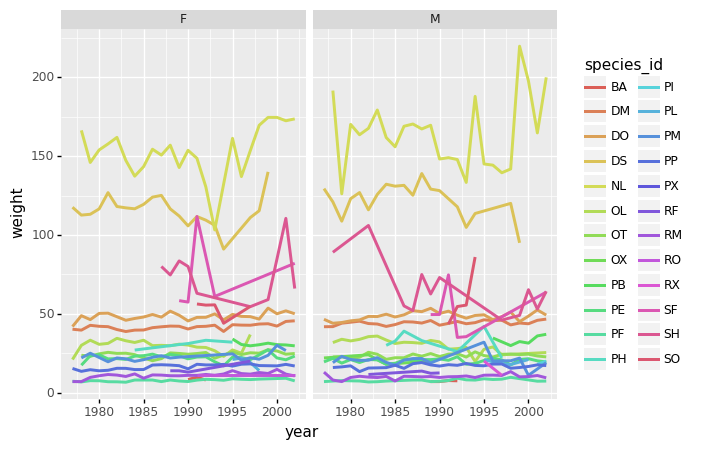

<ggplot: (8794785909593)>

In [61]:
(p9.ggplot(data=df2,mapping=p9.aes(x='year',y='weight',color='species_id'))
        + p9.geom_line(size=1.2)
        + p9.facet_wrap('sex')
)

2. Can you find a way to change the name of the legend? What about its labels?

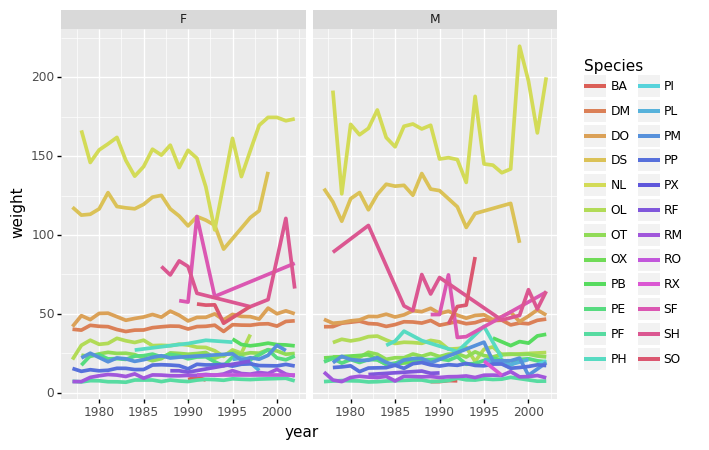

<ggplot: (8794786526277)>

In [62]:
(p9.ggplot(data=df2,mapping=p9.aes(x='year',y='weight',color='species_id'))
        + p9.geom_line(size=1.5)
        + p9.facet_wrap('sex')
        + p9.labs(color='Species')
)

3. Use a different color palette (see http://www.cookbook-r.com/Graphs/Colors_(ggplot2))

/Users/baldikacti/miniconda3/lib/python3.7/site-packages/mizani/palettes.py:397: UserWarning: Warning message:Brewer palette Accent has a maximum of 8 colors Returning the palette you asked for with that many colors
/Users/baldikacti/miniconda3/lib/python3.7/site-packages/mizani/palettes.py:397: UserWarning: Warning message:Brewer palette Accent has a maximum of 8 colors Returning the palette you asked for with that many colors


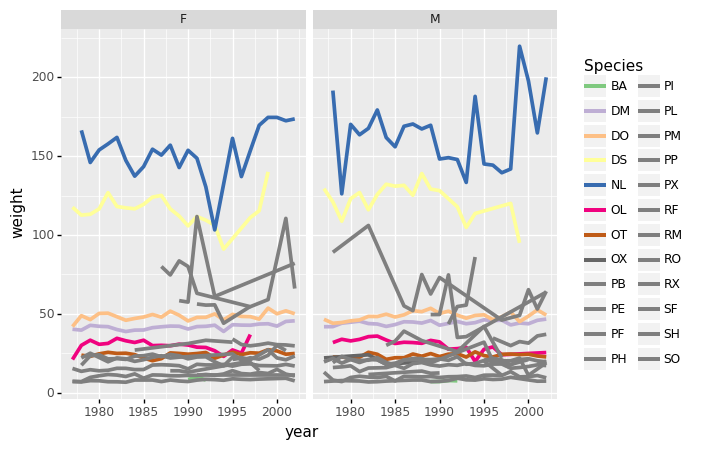

<ggplot: (8794768891177)>

In [91]:
(p9.ggplot(data=df2,mapping=p9.aes(x='year',y='weight',color='species_id'))
        + p9.geom_line(size=1.5)
        + p9.facet_wrap('sex')
        + p9.labs(color='Species')
        + p9.scales.scale_color_brewer(type='qual', palette=1)
)